In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df_train=pd.read_csv('train.csv')
df_train.head()

In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df=df_train.drop(['location','keyword','id'],axis=1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


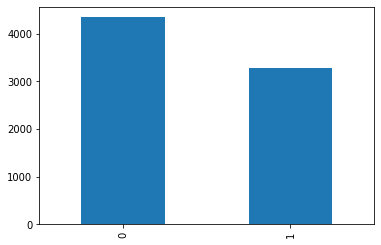

In [6]:
graph=pd.value_counts(df['target']).plot.bar()
graph

In [7]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

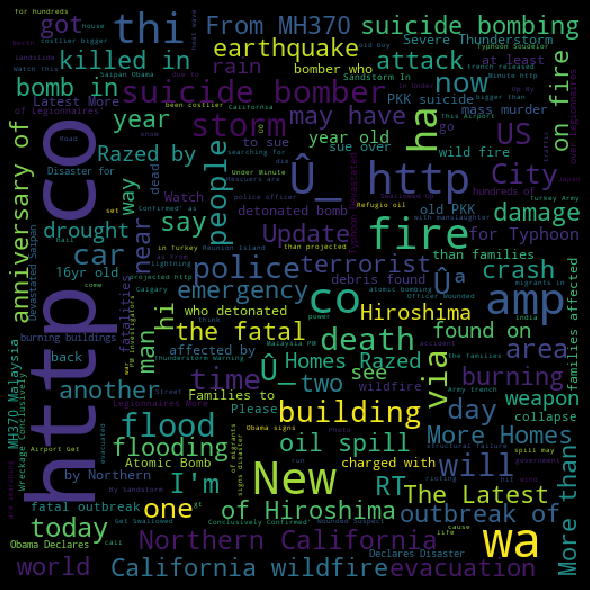

In [8]:
dis_words=' '.join(list(df[df['target']==1]['text']))
dis= WordCloud(width=512,height=512).generate(dis_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(dis)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
import nltk
from textblob import TextBlob
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import string
import re
def preprocessing(txt):
    txt= re.sub(r"http\S+", "", txt)
    txt= re.sub('@[^\s]+','',txt)
    #### stemming
    stemmer = nltk.PorterStemmer()
    txt=[stemmer.stem(word) for word in txt.split()]
    txt=" ".join(str(v) for v in txt)
    #### lemmtization    
#     docs = nlp(txt)
#     txt=[token.lemma_ for token in docs] 
#     txt=" ".join(str(v) for v in txt)
    ######
    p = string.digits + string.punctuation
    table = str.maketrans(p, len(p)*" ")
    txt = txt.translate(table)
    txt = txt.lower()
    return txt

No difference in result but stemming is much faster

In [10]:

for index, row in df.iterrows():
    df.at[index,'text'] = remove_emoji(row['text'])
    df.at[index,'text']=preprocessing(row['text'])

In [11]:
df

,text,target
0,our deed are the reason of thi earthquak may ...,1
1,forest fire near la rong sask canada,1
2,all resid ask to shelter in place are be not...,1
3,peopl receiv wildfir evacu order in ca...,1
4,just got sent thi photo from rubi alaska as s...,1
...,...,...
7608,two giant crane hold a bridg collaps into near...,1
7609,the out of control wild fire in california eve...,1
7610,m utc km s of volcano hawaii,1
7611,polic investig after an e bik collid with a ca...,1


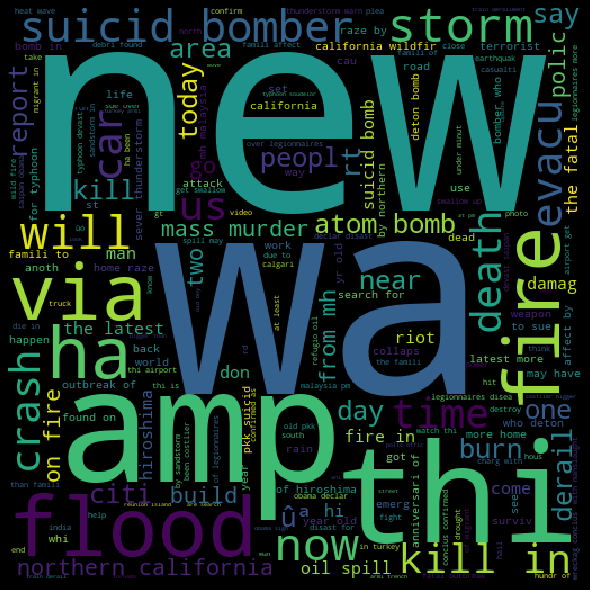

In [12]:
dis_words=' '.join(list(df[df['target']==1]['text']))
dis= WordCloud(width=512,height=512).generate(dis_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(dis)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:

stradsc = 'This is a tweet with a url: https://t.co/0DlGChTBIx aksjxnjsalax'
stradsc = re.sub(r"http\S+", "", stradsc)
stradsc

'This is a tweet with a url:  aksjxnjsalax'

In [14]:
Tweet = "Hello@username lkasnxlaks"
Tweet = re.sub('@[^\s]+','',Tweet)
Tweet

'Hello lkasnxlaks'

In [15]:
countvectorizer = CountVectorizer(stop_words = 'english', min_df = 2)
countvectorizer.fit(df['text'])
countvetor = countvectorizer.transform(df['text'])


In [16]:
import sklearn.feature_extraction.text as txt

Hashvectorizer = txt.HashingVectorizer(stop_words='english', binary=False, norm=None,alternate_sign=False)
Hashvectorizer.fit(df_train['text'])
Hashvetor = Hashvectorizer.transform(df_train['text'])

In [17]:
Tfidfvectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
Tfidfvectorizer.fit(df['text'])
Tfidfvetor = Tfidfvectorizer.transform(df['text'])

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
a_space=[0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1,10,25,50,56,70,100]
param_grid = {'alpha': a_space}
MNBclf = MultinomialNB()
MNBccc= GridSearchCV(MNBclf, param_grid, cv=5)
MNBccc.fit(Hashvetor,df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 25, 50, 56, 70, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
print("Tuned alpha Parameters: {}".format(MNBccc.best_params_)) 
print("Best score is {}".format(MNBccc.best_score_))

Tuned alpha Parameters: {'alpha': 56}
Best score is 0.7228514507727762


In [20]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(countvetor,df['target'], random_state=999)

In [21]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(X_trains,y_trains)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
MNBclf.score(X_trains,y_trains)

0.8717813977929585

In [23]:
MNBclf.score(X_tests,y_tests)

0.7930672268907563

In [24]:
from sklearn.naive_bayes import BernoulliNB
NBclf = BernoulliNB()
NBclf.fit(X_trains,y_trains)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
NBclf.score(X_trains,y_trains)

0.8728323699421965

In [26]:
NBclf.score(X_tests,y_tests)

0.8025210084033614

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(X_trains,y_trains)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2]:
reg.score(X_trains,y_trains)

NameError: name 'reg' is not defined

In [29]:
reg.score(X_tests,y_tests)

0.7951680672268907

In [30]:
from sklearn.svm import SVC
SVClassifier = SVC()
SVClassifier.fit(X_trains,y_trains)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
SVClassifier.score(X_trains,y_trains)

0.932037134349273

In [32]:
SVClassifier.score(X_tests,y_tests)

0.7941176470588235